In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline

df = pd.read_csv('airline.csv')
df.head()

,Unnamed: 0,ItinID,FarePerMile,Coupons,Origin,RoundTrip,OnLine,RPCarrier,Passengers,ItinFare,BulkFare,Distance,DistanceGroup,MilesFlown,OriginState
0,303,201611931654,0.3505,2,ORD,0.0,1.0,DL,1.0,416.0,0.0,1187.0,3,1187.0,IL
1,304,201611935662,0.8851,2,ORD,1.0,1.0,DL,1.0,416.0,0.0,470.0,1,470.0,IL
2,464,201612288325,0.3562,2,ORD,1.0,1.0,EV,1.0,416.0,0.0,1168.0,3,1168.0,IL
3,465,201612288420,0.5086,2,ORD,1.0,0.0,EV,1.0,416.0,0.0,818.0,2,818.0,IL
4,466,201612288910,0.2737,2,ORD,1.0,0.0,EV,1.0,416.0,0.0,1520.0,4,1520.0,IL


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123086 entries, 0 to 123085
Data columns (total 15 columns):
Unnamed: 0       123086 non-null int64
ItinID           123086 non-null int64
FarePerMile      123086 non-null float64
Coupons          123086 non-null int64
Origin           123086 non-null object
RoundTrip        123086 non-null float64
OnLine           123086 non-null float64
RPCarrier        123086 non-null object
Passengers       123086 non-null float64
ItinFare         123086 non-null float64
BulkFare         123086 non-null float64
Distance         123086 non-null float64
DistanceGroup    123086 non-null int64
MilesFlown       123086 non-null float64
OriginState      123086 non-null object
dtypes: float64(8), int64(4), object(3)
memory usage: 14.1+ MB


In [362]:
df.dtypes

Unnamed: 0         int64
ItinID             int64
FarePerMile      float64
Coupons            int64
Origin            object
RoundTrip        float64
OnLine           float64
RPCarrier         object
Passengers       float64
ItinFare         float64
BulkFare         float64
Distance         float64
DistanceGroup      int64
MilesFlown       float64
OriginState       object
dtype: object

<h1 align='center'>Exploratory Data Analysis</h1>

In [363]:
df['ItinFare'].describe()

count    123086.000000
mean        393.376322
std         197.107510
min         101.000000
25%         241.000000
50%         356.000000
75%         506.000000
max        1000.000000
Name: ItinFare, dtype: float64

In [364]:
df['MilesFlown'].describe()

count    123086.000000
mean       1856.113677
std        1252.732645
min          67.000000
25%         977.000000
50%        1628.000000
75%        2364.000000
max       11598.000000
Name: MilesFlown, dtype: float64

In [365]:
df['Distance'].describe()
#Includes ground transport distance

count    123086.000000
mean       1865.977317
std        1260.047352
min          67.000000
25%         977.000000
50%        1650.000000
75%        2368.000000
max       11598.000000
Name: Distance, dtype: float64

In [168]:
df['Passengers'].describe()

count    123086.000000
mean          2.324749
std           5.355503
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         259.000000
Name: Passengers, dtype: float64

In [366]:
df['Coupons'].describe()

count    123086.000000
mean          2.120322
std           0.852858
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: Coupons, dtype: float64

In [367]:
df['RPCarrier'].value_counts()

AA    30028
UA    27629
WN    19962
MQ     8379
OO     6906
DL     6199
EV     5880
YX     3699
G7     3604
S5     3051
NK     2726
B6      997
F9      976
AS      974
9E      943
CP      566
VX      557
YV       10
Name: RPCarrier, dtype: int64

In [368]:
df['Origin'].value_counts()

ORD    100159
MDW     22927
Name: Origin, dtype: int64

In [369]:
df.corr()

,Unnamed: 0,ItinID,FarePerMile,Coupons,RoundTrip,OnLine,Passengers,ItinFare,BulkFare,Distance,DistanceGroup,MilesFlown
Unnamed: 0,1.000000,-0.043635,-0.074984,0.514145,0.164347,-0.197722,-0.093143,0.244461,NaN,0.289079,0.287439,0.279095
ItinID,-0.043635,1.000000,0.116424,-0.067241,-0.009427,0.002662,-0.012712,-0.022657,NaN,-0.146532,-0.143366,-0.146555
FarePerMile,-0.074984,0.116424,1.000000,-0.249469,-0.187428,0.014739,-0.075430,0.298878,NaN,-0.433051,-0.427641,-0.434393
Coupons,0.514145,-0.067241,-0.249469,1.000000,0.529316,-0.381468,-0.114784,0.264324,NaN,0.537046,0.534743,0.529238
RoundTrip,0.164347,-0.009427,-0.187428,0.529316,1.000000,-0.202568,-0.011121,0.256498,NaN,0.362516,0.358755,0.360742
OnLine,-0.197722,0.002662,0.014739,-0.381468,-0.202568,1.000000,0.140218,-0.090924,NaN,-0.021370,-0.021762,-0.009162
Passengers,-0.093143,-0.012712,-0.075430,-0.114784,-0.011121,0.140218,1.000000,-0.135531,NaN,-0.009770,-0.011116,-0.007931
ItinFare,0.244461,-0.022657,0.298878,0.264324,0.256498,-0.090924,-0.135531,1.000000,NaN,0.311157,0.310981,0.309425
BulkFare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,0.289079,-0.146532,-0.433051,0.537046,0.362516,-0.021370,-0.009770,0.311157,NaN,1.000000,0.993134,0.997754


Just from the initial observation of the correlation table above, the strongest correlations of ItinFare are with Distance/DistanceGroup/MilesFlown
The other strong relationships are Coupons:Distance (53.7%), Coupons:DistanceGroup (53.4%), Coupons:MilesFlown (52.9%), Coupons:RoundTrip (52.9%). We can also analyze why ItinFare and FarePerMile don't have a high correlation.

In [370]:
df['Top3'] = [1 if x in ['AA','UA','WN'] else 0 for x in df['RPCarrier']]

In [371]:
df['OHare'] = [1 if x == 'ORD' else 0 for x in df['Origin']]

In [372]:
df = df.drop('BulkFare',axis = 1)
#we drop BulkFare as it has nothing in it

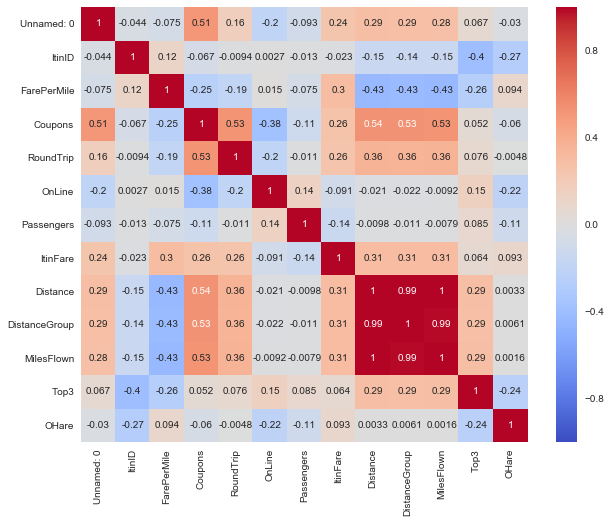

In [555]:
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
#heatmap of correlation

In [374]:
df.corr()['ItinFare']

Unnamed: 0       0.244461
ItinID          -0.022657
FarePerMile      0.298878
Coupons          0.264324
RoundTrip        0.256498
OnLine          -0.090924
Passengers      -0.135531
ItinFare         1.000000
Distance         0.311157
DistanceGroup    0.310981
MilesFlown       0.309425
Top3             0.063941
OHare            0.093472
Name: ItinFare, dtype: float64

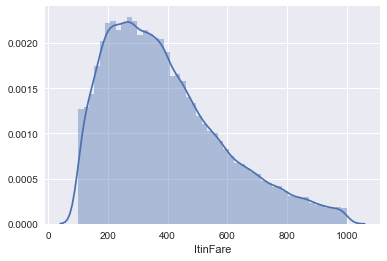

In [375]:
sns.distplot(df['ItinFare'])
plt.show()

In [376]:
#We identified that ItinFare is our result that we want to predict, so we separate it from the dataframe in order to
#run the linear regression
df1 = df['ItinFare']


In [377]:
dfx = df.drop('ItinFare',axis = 1)

In [378]:
#We perform a first run with the all the features and no transformations
features = ['Coupons','RoundTrip','OnLine','Passengers','Distance','DistanceGroup','MilesFlown']

In [379]:
X_train, X_test, y_train, y_test = train_test_split(dfx[features], df1, test_size = 0.3)

In [380]:
lm = LinearRegression()
testmodel = lm.fit(X_train, y_train)
X_train.columns
dftest = pd.DataFrame(testmodel.coef_,X_train.columns, columns = ['Coefficients'])
dftest
#We examine the coefficients, RoundTrip 

,Coefficients
Coupons,8.122219
RoundTrip,62.177009
OnLine,-12.194311
Passengers,-4.372632
Distance,0.024491
DistanceGroup,9.652752
MilesFlown,-0.006227


In [381]:
testmodel.intercept_
#Base price, we can see that this is already way off as the minimum price was $101

275.51536392279831

In [382]:
prediction = testmodel.predict(X_train)

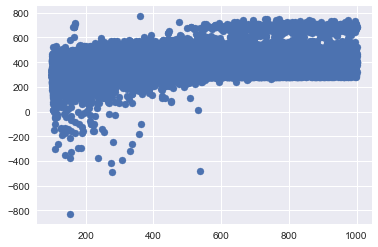

In [383]:
plt.scatter(x = y_train, y = prediction)

In [384]:
from sklearn import metrics
print 'R^2:', testmodel.score(X_train, y_train)
print 'MAE:', metrics.mean_absolute_error(y_train, prediction)
print 'MSE:', metrics.mean_squared_error(y_train, prediction)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_train, prediction))
#Low R^2 value and high errors

R^2: 0.140194599685
MAE: 145.338418843
MSE: 33276.5373504
RMSE: 182.418577317


In [385]:
score = cross_val_score(testmodel, x_train, y_train)
for score in score:
    print 'One score I got in Prototype Model 1 was %s' % score

One score I got in Prototype Model 1 was -1.36014188223e-06
One score I got in Prototype Model 1 was -0.00064920882866
One score I got in Prototype Model 1 was -0.000634109197337


In [386]:
ridge = Ridge(alpha = 100)
testridge = testr.fit(X_train, y_train)
dfrtest = pd.DataFrame(testridge.coef_,X_train.columns,columns = ['Coefficients'])
dfrtest


,Coefficients
Coupons,8.240283
RoundTrip,61.704483
OnLine,-12.139330
Passengers,-4.371532
Distance,0.024757
DistanceGroup,9.513276
MilesFlown,-0.006196


In [387]:
testridge.score(X_train,y_train)

0.1401936945336355

In [388]:
#Lets only include features that have strong correlation to ItinFare

In [389]:
features = ['Coupons','RoundTrip','Distance','DistanceGroup','MilesFlown']

In [390]:
X_train, X_test, y_train, y_test = train_test_split(dfx[features], df1, test_size = 0.3)

In [391]:
model1 = lm.fit(X_train,y_train)
dfm1 = pd.DataFrame(model1.coef_,X_train.columns, columns = ['Coefficients'])
print dfm1
print model1.intercept_

               Coefficients
Coupons           16.761433
RoundTrip         58.840601
Distance           0.028935
DistanceGroup     12.069647
MilesFlown        -0.018050
245.223897924


R^2 0.124150117885


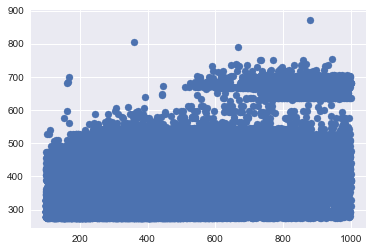

In [392]:
predictions = model1.predict(X_train)
print "R^2", model1.score(X_train,y_train)
plt.scatter(x=y_train, y = predictions)

In [393]:
print 'MAE:', metrics.mean_absolute_error(y_train, predictions)
print 'MSE:', metrics.mean_squared_error(y_train, predictions)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions))
#Even worse R^2 value and errors

MAE: 147.627041393
MSE: 34205.026641
RMSE: 184.946010071


In [394]:
#We will apply the log function to distance and miles flown

In [395]:
dfx['DistanceLog'] = dfx['Distance'].apply(lambda x: np.log(x))
dfx['MilesFlownLog'] = dfx['MilesFlown'].apply(lambda x: np.log(x))
dfx.head()

,Unnamed: 0,ItinID,FarePerMile,Coupons,Origin,RoundTrip,OnLine,RPCarrier,Passengers,Distance,DistanceGroup,MilesFlown,OriginState,Top3,OHare,DistanceLog,MilesFlownLog
0,303,201611931654,0.3505,2,ORD,0.0,1.0,DL,1.0,1187.0,3,1187.0,IL,0,1,7.079184,7.079184
1,304,201611935662,0.8851,2,ORD,1.0,1.0,DL,1.0,470.0,1,470.0,IL,0,1,6.152733,6.152733
2,464,201612288325,0.3562,2,ORD,1.0,1.0,EV,1.0,1168.0,3,1168.0,IL,0,1,7.063048,7.063048
3,465,201612288420,0.5086,2,ORD,1.0,0.0,EV,1.0,818.0,2,818.0,IL,0,1,6.706862,6.706862
4,466,201612288910,0.2737,2,ORD,1.0,0.0,EV,1.0,1520.0,4,1520.0,IL,0,1,7.326466,7.326466


In [396]:
features = ['Coupons','RoundTrip','DistanceLog','DistanceGroup','MilesFlownLog']

In [397]:
X_train, X_test, y_train, y_test = train_test_split(dfx[features], df1, test_size = 0.3)

In [398]:
model2 = lm.fit(X_train,y_train)
dfm2 = pd.DataFrame(model2.coef_,X_train.columns,columns = ['Coefficients'])
dfm2

,Coefficients
Coupons,17.015867
RoundTrip,71.498100
DistanceLog,81.511171
DistanceGroup,29.899306
MilesFlownLog,-136.584702


In [399]:
model2.intercept_

582.23852357454905

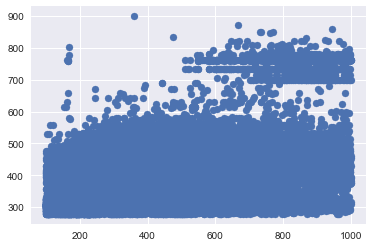

In [400]:
predictions = model2.predict(X_train)
plt.scatter(x = y_train,y = predictions)

In [401]:
print "R^2", model1.score(X_train,y_train)
print 'MAE:', metrics.mean_absolute_error(y_train, predictions)
print 'MSE:', metrics.mean_squared_error(y_train, predictions)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions))

R^2 0.132683299057
MAE: 146.065651584
MSE: 33754.8983743
RMSE: 183.725061911


In [402]:
ridge = Ridge(alpha = 100)
model2r = ridge.fit(X_train,y_train)
dfm2r = pd.DataFrame(model2r.coef_,X_train.columns,columns = ['Coefficients'])
dfm2r

,Coefficients
Coupons,17.731318
RoundTrip,70.822948
DistanceLog,10.450930
DistanceGroup,29.834495
MilesFlownLog,-65.412979


In [403]:
model2r.score(X_train,y_train)

0.13252120919186239

In [483]:
dfx['Distance2'] = dfx['Distance'].apply(lambda x: x ** 2)
dfx['MilesFlown2'] = dfx['Distance'].apply(lambda x: x ** 2)
dfx.head()
#We will square and cube the distances to see if it improves our model

,Unnamed: 0,ItinID,FarePerMile,Coupons,Origin,RoundTrip,OnLine,RPCarrier,Passengers,Distance,DistanceGroup,MilesFlown,OriginState,Top3,OHare,DistanceLog,MilesFlownLog,Distance2,MilesFlown2
0,303,201611931654,0.3505,2,ORD,0.0,1.0,DL,1.0,1187.0,3,1187.0,IL,0,1,7.079184,7.079184,1408969.0,1408969.0
1,304,201611935662,0.8851,2,ORD,1.0,1.0,DL,1.0,470.0,1,470.0,IL,0,1,6.152733,6.152733,220900.0,220900.0
2,464,201612288325,0.3562,2,ORD,1.0,1.0,EV,1.0,1168.0,3,1168.0,IL,0,1,7.063048,7.063048,1364224.0,1364224.0
3,465,201612288420,0.5086,2,ORD,1.0,0.0,EV,1.0,818.0,2,818.0,IL,0,1,6.706862,6.706862,669124.0,669124.0
4,466,201612288910,0.2737,2,ORD,1.0,0.0,EV,1.0,1520.0,4,1520.0,IL,0,1,7.326466,7.326466,2310400.0,2310400.0


In [504]:
features = ['Distance2','RoundTrip','Coupons','OHare']

In [512]:
X_train, X_test, y_train, y_test = train_test_split(dfx[features], df1, test_size = 0.3)

In [513]:
model3 = lm.fit(X_train,y_train)
dfm3 = pd.DataFrame(model3.coef_,X_train.columns,columns = ['Coefficients'])
dfm3

,Coefficients
Distance2,0.000005
RoundTrip,68.331255
Coupons,19.400206
OHare,45.553248


In [507]:
model3.score(X_train,y_train)

0.14138401119542443

In [ ]:
#What if we try using a log function on the target

In [452]:
df1l = df1.apply(lambda x: np.log(x))


In [496]:
features = ['RoundTrip','Coupons','Distance2','OHare','Top3']

In [497]:
X_train, X_test, y_train, y_test = train_test_split(dfx[features], df1l, test_size = 0.3)

In [498]:
model4 = lm.fit(X_train,y_train)
dfm4 = pd.DataFrame(model4.coef_,X_train.columns,columns = ['Coefficients'])
dfm4

,Coefficients
RoundTrip,2.345960e-01
Coupons,6.701470e-02
Distance2,9.862868e-09
OHare,1.202211e-01
Top3,3.694673e-02


In [499]:
model4.score(X_train,y_train)

0.14985754552334352

In [517]:
dfx['BI'] = [1 if x in ['AA','NK','B6','DL','AS','UA','WN'] else 0 for x in df['RPCarrier']]
#Ranking according to Business Insider

In [527]:
features = ['RoundTrip','Coupons','Distance2','OHare','BI']

In [528]:
X_train, X_test, y_train, y_test = train_test_split(dfx[features], df1l, test_size = 0.3)

In [547]:
model5 = lm.fit(X_train,y_train)
dfm5 = pd.DataFrame(model5.coef_,X_train.columns,columns = ['Coefficients'])
dfm5

,Coefficients
RoundTrip,2.303793e-01
Coupons,6.684561e-02
Distance2,1.107496e-08
OHare,8.730433e-02
BI,-7.001235e-02


In [548]:
predictions = model5.predict(X_train)

In [549]:
print "R^2", model5.score(X_train,y_train)
print 'MAE:', metrics.mean_absolute_error(y_train, predictions)
print 'MSE:', metrics.mean_squared_error(y_train, predictions)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions))

R^2 0.150059560731
MAE: 0.386693050604
MSE: 0.2257489587
RMSE: 0.475130464925


In [531]:
model5.score(X_train,y_train)

0.15005956073080562

In [536]:
ridge = Ridge(alpha = 100)
model5r = ridge.fit(X_train,y_train)
dfm5r = pd.DataFrame(model5r.coef_,X_train.columns,columns = ['Coefficients'])
dfm5r

,Coefficients
RoundTrip,2.287720e-01
Coupons,6.713439e-02
Distance2,1.108051e-08
OHare,8.673123e-02
BI,-6.977666e-02


In [537]:
model5r.score(X_train,y_train)

0.15005774959251839

In [ ]:
#15% is the highest I could achieve based on the workings above, so we will be using model5

In [538]:
model5.score(X_test,y_test)

0.15243235382570219

In [550]:
predictions = model5.predict(X_test)


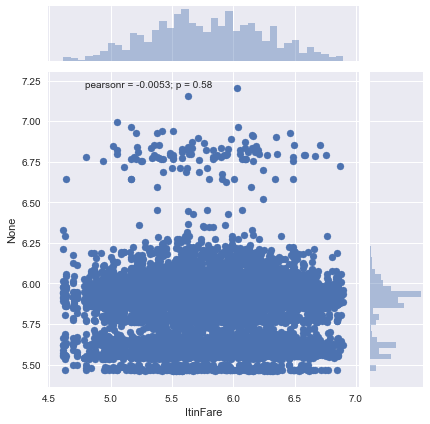

In [551]:
sns.jointplot(x = y_test, y = pd.Series(predictions), kind = 'scatter')

In [552]:
print "R^2", model5.score(X_test,y_test)
print 'MAE:', metrics.mean_absolute_error(y_test, predictions)
print 'MSE:', metrics.mean_squared_error(y_test, predictions)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))

R^2 0.152432353826
MAE: 0.387178537523
MSE: 0.22649489954
RMSE: 0.475914802817


In [553]:
dfm5

,Coefficients
RoundTrip,2.303793e-01
Coupons,6.684561e-02
Distance2,1.107496e-08
OHare,8.730433e-02
BI,-7.001235e-02


In [554]:
model5.intercept_

5.4654181422775316

In [1]:
#We are using log(ItinFare) as the target, and it seems like RoundTrip has the biggest effect on log(ItinFare)

In [ ]:
#Would appreciate if you can share how Richard got a R^2 of 40%, thanks!